In [1]:
import pickle

def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b

book_data = load_obj("processed_arr2.pickle")

In [3]:
for book in book_data[0:5]:
    print book

{'streak': '12', 'owi': '435335', 'title': 'DESIREE', 'authors': ['Annemarie Selinko'], 'rank': '1', 'fast_subjects': set([u'D\xe9sir\xe9e, Queen, consort of Charles XIV John, King of Sweden and Norway, 1777-1860', 'Napoleon I, Emperor of the French, 1769-1821', 'English language', 'Relations with women']), 'year_pub': '1951', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Female', 'viaf': '17229435', 'name': 'Annemarie Selinko'}]}
{'streak': '38', 'owi': '104466836', 'title': 'THE SILVER CHALICE', 'authors': ['Thomas B. Costain'], 'rank': '2', 'fast_subjects': set(['Historical fiction', 'Jesus Christ', 'Christian fiction', 'History of Biblical events', 'Grail', 'Bible.--New Testament', 'Last Supper']), 'year_pub': '1926', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '97749233', 'name': 'Thomas B. Costain'}]}
{'streak': '7', 'owi': '354027094', 'title': 'GOLDEN ADMIRAL', 'authors': ['Francis Van 

In [4]:
def is_book(x,book,fields):
    for f in fields:
        if x[f] != book[f]:
            return False
    return True

def find_book_in(book,ls,fields):
    for x in ls:
        if is_book(x,book,fields):
            return ls.index(x)
    return -1

def greater_than(book1,book2,f_to_max):
    try:
        f1 = int(book1[f_to_max])
        f2 = int(book2[f_to_max])
        if f_to_max == "rank":
            f1 = -f1
            f2 = -f2
        if f1>f2:
            return True
        else:
            return False
    except:
        return False

def get_unique_books_max(ls,u_fields,max_this):
    target =[]
    for book in ls:
        tar_index = find_book_in(book,target,u_fields)
        if tar_index>-1:
            tar_book = target[tar_index]
            if greater_than(book,tar_book,max_this):
                target[tar_index] = book
        else:
            target.append(book)
    return target
            


In [5]:
import random,pandas,matplotlib,re,math
%matplotlib inline

random.seed(0)
alph = re.compile('[^a-zA-Z]')
genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","erotic"],"stops":["language"]}, #took out 'domestic'
              "domestic":{"keys":["domestic"]},
              "suspense":{"keys":["suspense"]},
              "legal":{"keys":["legal"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic"]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "ya":{"keys":["young adult"]},
              "war":{"keys":["war "]},
              "religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "historical":{"keys":["historical"]} ## <-- I think this one might not be a well-supported
                                                   ## category in the DB
            }

def get_decade(year):
    frac = float(year)/10
    return math.floor(frac)*10

def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in fast_term.lower():
            target = True
    for stop in stops:
        if stop in fast_term.lower():
            target = False
    return target


def class_gender(gender_ls):
    if len(gender_ls) == 1:
        return gender_ls[0]['gender']
    else:
        fem = 0
        male = 0
        for x in gender_ls:
            if x['gender'] == 'Female': ## THIS TREATS MIXED GENDER TEAMS AS FEMALE
                fem = fem+1
                male = male+1
            else:
                if x['gender'] == 'Male':
                    male = male+1
        if fem+male == 0:
            return 'NA'
        ratio = float(fem)/float(fem+male)
        if ratio == 1:
            return 'Female'
        if ratio == 0:
            return 'Male'
        return 'Both'

def new_class_genre(subject_ls):
    target = []
    for sub in subject_ls:
        if genre_candidate(sub):
            for genre in genre_dict:
                if is_genre(sub,genre):
                    target.append(genre)
    if len(target) > 1:
        return random.choice(target)
    if len(subject_ls)>0:
        return "zz_no genre"
    else:
        return "zz_needs label"
        
def prep_dataframe(df):
    df = df.drop_duplicates(["title","year"])
    df.loc[:,"genre"] = df["fast_subjects"].apply(new_class_genre)
    df.loc[:,"gender"] = df["genders"].apply(class_gender)
    return df

In [6]:
max_ranks = get_unique_books_max(book_data,["title","authors"],"rank")

gender                Both    Female      Male        NA
rank                                                    
1       0.022942  0.018893  0.333333  0.607287  0.017544
2       0.021930  0.006579  0.368421  0.581140  0.021930
3       0.024283  0.011038  0.373068  0.560706  0.030905
4       0.022173  0.004435  0.354767  0.589800  0.028825
5       0.016216  0.008108  0.408108  0.540541  0.027027
6       0.024064  0.002674  0.342246  0.601604  0.029412
7       0.033592  0.007752  0.330749  0.594315  0.033592
8       0.032070  0.017493  0.376093  0.551020  0.023324
9       0.045584  0.014245  0.393162  0.529915  0.017094
10      0.030769  0.012308  0.403077  0.510769  0.043077
11      0.043956  0.007326  0.340659  0.589744  0.018315
12      0.037313  0.011194  0.395522  0.526119  0.029851
13      0.037801       NaN  0.350515  0.560137  0.051546
14      0.058333  0.016667  0.370833  0.529167  0.025000
15      0.115108  0.014388  0.244604  0.589928  0.035971
16      0.219512       NaN  0.2

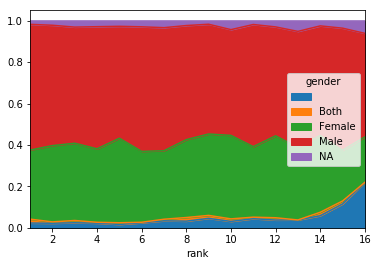

In [80]:
def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

rank_df = pandas.DataFrame(max_ranks)
ndf = prep_dataframe(rank_df)
ndf.loc[:,"rank"] = pandas.to_numeric(ndf["rank"], errors='coerce')
ndf = ndf[ndf["rank"]!=0]
ndf.loc[:,"decade"] = ndf["year"].apply(get_decade)
rank_gender = pandas.DataFrame({'count' : ndf.groupby( ["rank", "gender"] ).size()}).reset_index()

rank_totals = pandas.DataFrame({'sum' : ndf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
print rank_gender
rank_gender.plot(kind="area")


In [49]:
def graph_gender_ratio_rank(odf,dec):
    odf = pandas.concat([(odf[odf["gender"] == "Male"]), (odf[odf["gender"] == "Female"])])
    rank_gender = pandas.DataFrame({'count' : odf.groupby( ["rank", "gender"] ).size()}).reset_index()
    rank_totals = pandas.DataFrame({'sum' : odf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]
    rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
    rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
    ax = rank_gender.plot(kind = "area")
    ax.set_title(str(dec)+'s')
    return ax


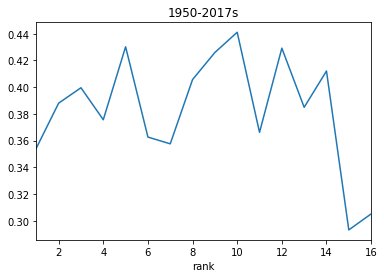

In [44]:
fig = graph_gender_ratio_rank(ndf,"1950-2017").get_figure()
#fig.savefig("proportion_of_women_by_rank.png")

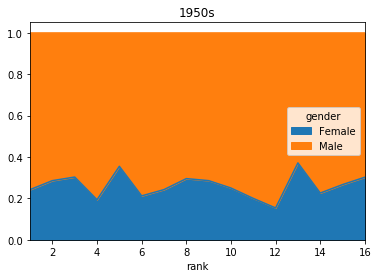

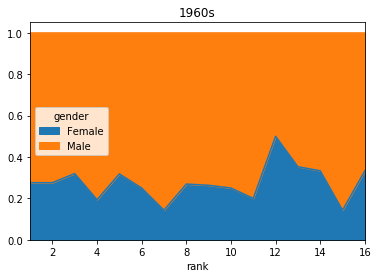

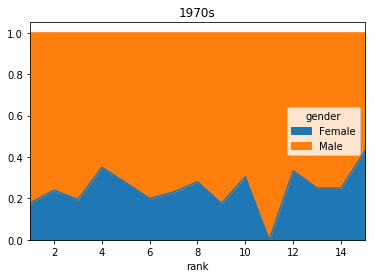

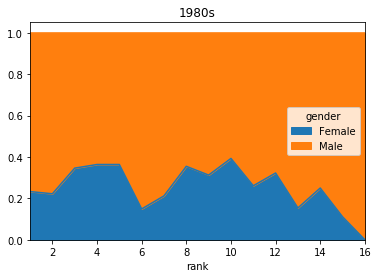

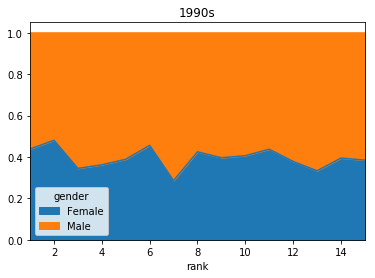

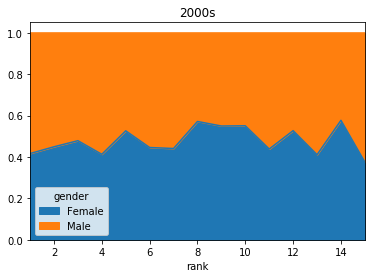

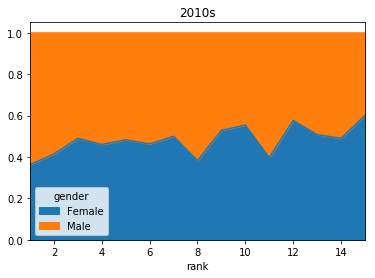

In [50]:
decades =[1950,1960,1970,1980,1990,2000,2010]
for decade in decades:
    #print decade 
    decade_frame = ndf[ndf["decade"]==decade]
    ax = graph_gender_ratio_rank(decade_frame,decade)

In [26]:
max_streaks = get_unique_books_max(book_data,["title","authors"],"streak")

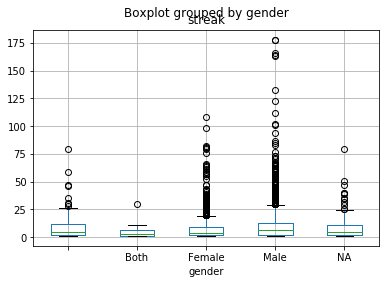

In [51]:
streak_df = pandas.DataFrame(max_streaks)
ndf = prep_dataframe(streak_df)
ndf.loc[:,"streak"] = pandas.to_numeric(ndf["streak"], errors='coerce')
fig = ndf.boxplot(column="streak",by="gender").get_figure()
fig.savefig("boxplot_streaks.png")
#ndf = ndf[ndf["streak"]>10]

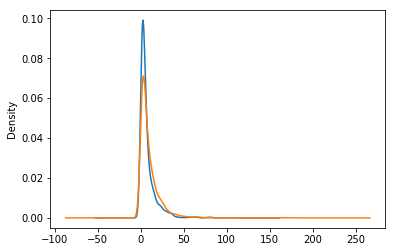

In [58]:
female = ndf[ndf["gender"]=="Female"]
male = ndf[ndf["gender"]=="Male"]
ax = female["streak"].plot.density()
fig = male["streak"].plot.density(ax=ax).get_figure()
fig.savefig("streak_density.png")

19


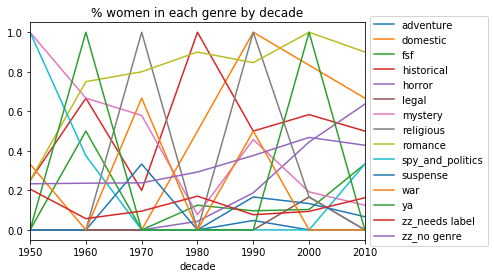

In [134]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
#book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["decade", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["decade", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

def multilayer_ctp(value,group_fs,totals_ls):
    i = 0
    layer = totals_ls
    for x in group_fs:
        next_layer = layer.loc[x]
        if i < (len(group_fs)-1):
            layer = pandas.DataFrame(next_layer)
            i = i+1
        else:
            layer = next_layer
    s = layer['sum']
    return float(value)/float(s)


books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['decade'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='decade', columns='genre', values='percent')
woman_counts = woman_counts.fillna(0)
ax = woman_counts.plot()
ax.set_title("% women in each genre by decade")
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig = ax.get_figure()
fig.savefig("percent_women_in_each_genre.png")

In [127]:
woman_counts

genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
decade,,,,,,,,,,,,,,,
1950.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.444444,0.0,0.000000,1.0,0.0,0.292308,0.260518
1960.0,0.20,0.00,0.000000,0.000000,0.000000,0.000000,0.777778,1.000000,1.000000,0.5,0.000000,0.0,1.0,0.111111,0.251989
1970.0,0.00,0.00,0.125000,0.428571,0.000000,0.000000,0.666667,1.000000,1.000000,0.2,0.000000,0.0,0.0,0.153846,0.247093
1980.0,0.00,1.00,0.111111,0.666667,0.045455,0.000000,0.076923,0.000000,0.625000,0.0,0.000000,0.0,0.0,0.350000,0.302026
1990.0,0.04,1.00,0.153846,0.333333,0.176471,0.090909,0.533333,1.000000,0.882353,0.0,0.125000,0.0,0.0,0.571429,0.389920
2000.0,0.00,0.75,0.258065,0.500000,0.250000,0.142857,0.260870,0.285714,0.933333,0.0,0.120000,0.0,0.0,0.400000,0.482733
2010.0,0.00,0.00,0.200000,0.714286,0.800000,0.250000,0.000000,0.000000,1.000000,0.0,0.076923,0.0,0.0,0.636364,0.446594


In [135]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
#book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["year", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["year", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['year'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='year', columns='genre', values='percent')
woman_counts

4


genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
year,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272727,0.271186
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.243243
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166667,0.323529
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.200000,0.222222
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.250000,0.254237
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.225806
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,0.274194
1957,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.293103
1958,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.269841


In [136]:
ygenre_totals

sum
year genre                
1950 romance             1
     zz_needs label     11
     zz_no genre        59
1951 adventure           1
     war                 1
     zz_needs label      8
     zz_no genre        74
1952 adventure           1
     historical          1
     zz_needs label      6
     zz_no genre        68
1953 fsf                 1
     legal               1
     religious           1
     romance             2
     zz_needs label      5
     zz_no genre        54
1954 religious           1
     romance             1
     zz_needs label      4
     zz_no genre        59
1955 fsf                 1
     zz_needs label      6
     zz_no genre        62
1956 adventure           1
     spy_and_politics    1
     zz_needs label      7
     zz_no genre        62
1957 adventure           2
     fsf                 1
...                    ...
2012 zz_needs label      2
     zz_no genre       183
2013 fsf                 1
     historical          2
     horror              2
     mystery             2
     suspense            1
     zz_needs label      2
     zz_no genre       195
2014 fsf                 2
     historical          1
     mystery             1
     romance             1
     suspense            3
     zz_no genre       186
2015 adventure           1
     fsf                 2
     mystery             1
     romance             1
     suspense            3
     zz_no genre       171
2016 fsf                 1
     horror              2
     legal               1
     mystery             1
     romance             1
     zz_no genre       162
2017 mystery             1
     zz_needs label      7
     zz_no genre        32

[484 rows x 1 columns]